# 데이터 분석용 라이브러리

In [334]:
import pandas as pd
import numpy as np

## 데이터 시각화용 라이브러리

In [335]:
import matplotlib.pyplot as plt
import seaborn as sns

## 한글 깨짐

In [336]:
from matplotlib import font_manager, rc 
import matplotlib.font_manager as fm

for font_path in fm.findSystemFonts(fontpaths = None, fontext = 'ttf'):
    if 'D2Coding' in font_path:
        font = font_manager.FontProperties(fname=font_path).get_name()
        rc('font', family=font)
        break 

# 데이터 로드

In [337]:
DATA_PATH='../../Data/titanic/'

df=pd.read_csv(DATA_PATH+'train.csv')
SEED=42

In [338]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [339]:
df.shape, df.columns

((891, 12),
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [340]:
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

## 타겟 데이터 확인

In [341]:
new_survived = pd.Categorical(df["survived"])
new_survived[:5]

[0, 1, 1, 1, 0]
Categories (2, int64): [0, 1]

In [342]:
new_survived=pd.Categorical(df['survived'])
new_survived=new_survived.rename_categories(['Died', 'Survived'])
print(new_survived[:5])
new_survived.describe()

['Died', 'Survived', 'Survived', 'Survived', 'Died']
Categories (2, object): ['Died', 'Survived']


,counts,freqs
categories,,
Died,549,0.616162
Survived,342,0.383838


## 데이터 분리

In [343]:
!pip install scikit-learn
from  sklearn.model_selection import train_test_split

In [344]:
SEED = 42

X_tr, X_te = train_test_split(df, random_state=SEED, test_size = 0.2)
X_tr = X_tr.reset_index(drop=True)
X_te = X_te.reset_index(drop=True)

X_tr.shape, X_te.shape

((712, 12), (179, 12))

In [345]:
new_survived = pd.Categorical(df["survived"])
new_survived = new_survived.rename_categories(["Died","Survived"])              
print(new_survived[:5])
new_survived.describe()

['Died', 'Survived', 'Survived', 'Survived', 'Died']
Categories (2, object): ['Died', 'Survived']


,counts,freqs
categories,,
Died,549,0.616162
Survived,342,0.383838


# Data Cleaning
> 데이터를 올바르고 효율적으로 사용하기 위해서는 좋은 데이터를 사용해야합니다. 좋은 데이터는 완결성, 유일성, 통일성을 특정을 갖습니다.  
  
> 하지만 항상 결측치 제거, 이상치 제거, 데이터 정규화 등을 하는 것이 좋은 것은 아닙니다. 모델이나 데이터 분포 또는 분석 목적에 따라 Data Cleaning을 하는 것이 좋습니다.

- 완결성
> 결측값을 가능하면 제거해야 합니다.
- 유일성 
> 중복 데이터가 있으면 안됩니다.
- 통일성
> 동일한 데이터형식 및 단위로 기록되어 있어야 합니다.
> 가능하면 정규화를 해야 합니다.    
> 이상치를 가능하면 제거해야 합니다.

## 중복 데이터 처리

In [346]:
print(f'before: {df.shape}')
df.drop_duplicates(keep = 'first', inplace=True, ignore_index=True)
print(f'after: {df.shape}')

before: (891, 12)
after: (891, 12)


### 필요 없는 데이터

In [347]:
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [348]:
# df['passengerid'].nunique(), df.shape[0]

In [349]:
# passengerid는 전체 데이터가 unique하기 때문에 삭제
# df.drop('passengerid', axis=1, inplace=True)
# df.columns

### 결측치

#### 결측치 유형 파악

#### 결측치 탐색

#### 통계 탐색

In [350]:
X_tr.info

<bound method DataFrame.info of      passengerid  survived  pclass                                name  \
0            332         0       1                 Partner, Mr. Austen   
1            734         0       2          Berriman, Mr. William John   
2            383         0       3                  Tikkanen, Mr. Juho   
3            705         0       3             Hansen, Mr. Henrik Juul   
4            814         0       3  Andersson, Miss. Ebba Iris Alfrida   
..           ...       ...     ...                                 ...   
707          107         1       3    Salkjelsvik, Miss. Anna Kristine   
708          271         0       1               Cairns, Mr. Alexander   
709          861         0       3             Hansen, Mr. Claus Peter   
710          436         1       1           Carter, Miss. Lucile Polk   
711          103         0       1           White, Mr. Richard Frasar   

        sex   age  sibsp  parch             ticket      fare    cabin embarked 

In [351]:
X_tr.isnull().sum().sum()

695

In [352]:
X_tr.isnull().sum().sort_values(ascending=False)

cabin          553
age            140
embarked         2
passengerid      0
survived         0
pclass           0
name             0
sex              0
sibsp            0
parch            0
ticket           0
fare             0
dtype: int64

In [353]:
(X_tr.isnull().sum() / X_tr.shape[0]).round(4).sort_values(ascending=False)

cabin          0.7767
age            0.1966
embarked       0.0028
passengerid    0.0000
survived       0.0000
pclass         0.0000
name           0.0000
sex            0.0000
sibsp          0.0000
parch          0.0000
ticket         0.0000
fare           0.0000
dtype: float64

<AxesSubplot: >

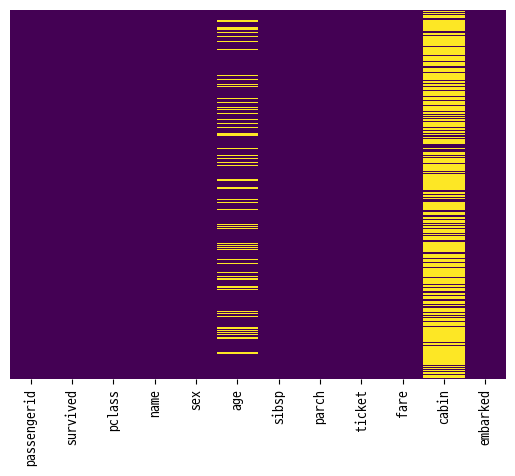

In [354]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

Text(0.5, 1.0, 'Total Missing Value (%)')

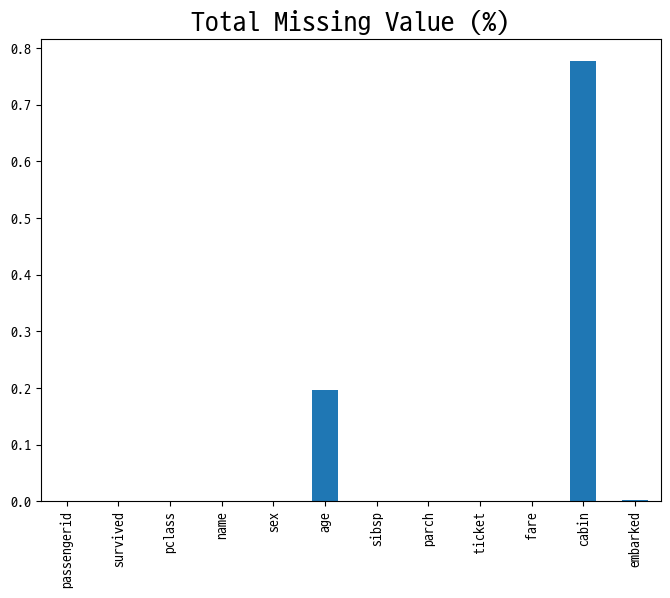

In [355]:
total = X_tr.isnull().sum().sort_values(ascending=False)
percent=(X_tr.isnull().sum() / X_tr.isnull().count().sort_values(ascending=False))
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
percent_data=percent.head(20)
percent_data.plot(kind='bar', figsize=(8,6), fontsize=10)

plt.xlabel('', fontsize=20)
plt.ylabel('', fontsize=20)
plt.title('Total Missing Value (%)', fontsize=20)

In [356]:
X_tr['hasCabin'] = X_tr['cabin'].isnull().apply(lambda x: 0 if x == True else 1)
X_tr['hasAge'] = X_tr['age'].isnull().apply(lambda x: 0 if x == True else 1)

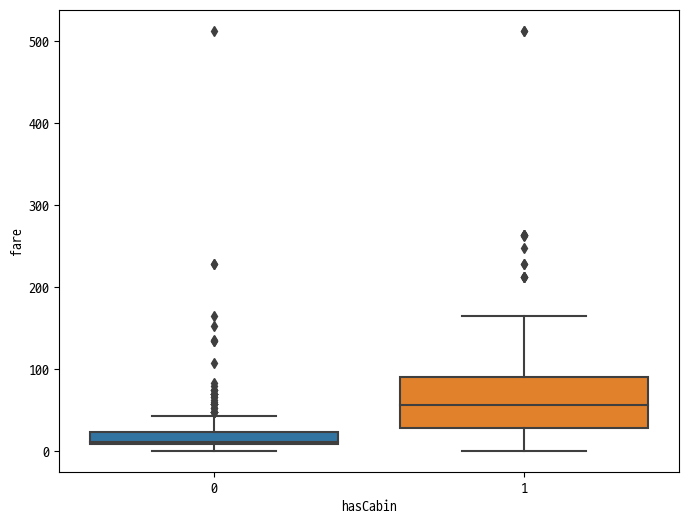

In [357]:
data = pd.concat([X_tr['fare'], X_tr['hasCabin']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='hasCabin', y="fare", data=data)

In [358]:
!pip install statsmodels

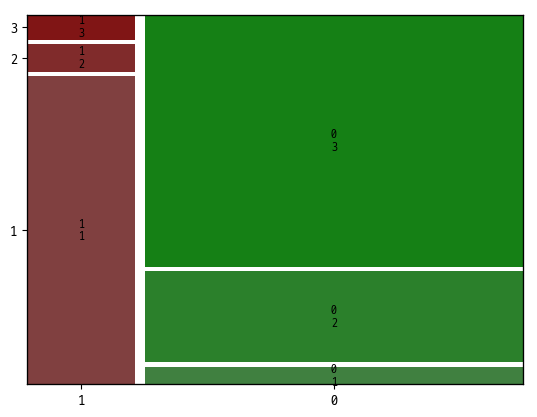

In [359]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(X_tr, ['hasCabin', 'pclass'], gap=0.02)
plt.show()

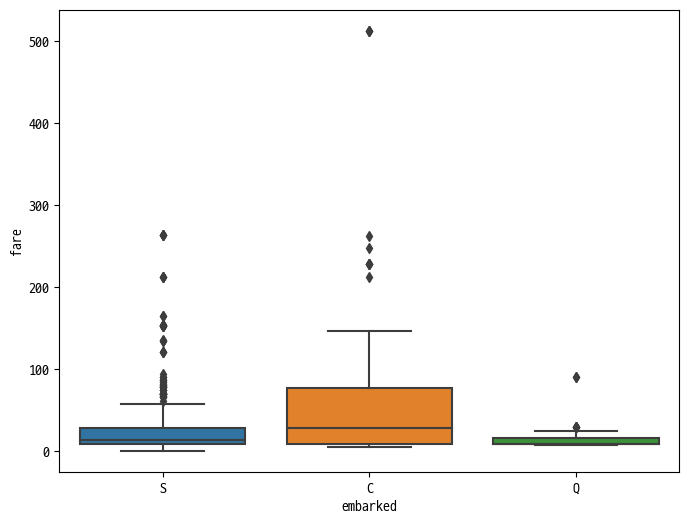

In [360]:
data = pd.concat([X_tr['fare'], X_tr['embarked']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='embarked', y="fare", data=data)

<AxesSubplot: xlabel='embarked', ylabel='fare'>

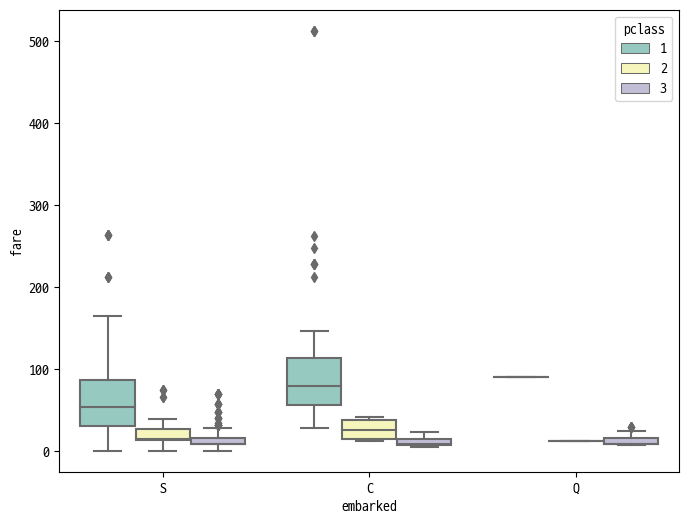

In [361]:
f, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='embarked', y='fare', hue='pclass', data=X_tr, palette='Set3')

결측치 처리

제거

In [362]:
print(f'before: {X_tr.shape} / isnull().sum(): {X_tr.isnull().sum().sum()}')
df_droprows = X_tr.dropna(axis=0)
print(f'after: {df_droprows.shape} / isnull().sum(): {df_droprows.isnull().sum().sum()}')

before: (712, 14) / isnull().sum(): 695
after: (143, 14) / isnull().sum(): 0


In [363]:
print(f'before: {X_tr.shape} / isnull().sum(): {X_tr.isnull().sum().sum()}')
df_dropcols = df.dropna(axis=1)
print(f'after: {df_dropcols.shape} / isnull().sum(): {df_dropcols.isnull().sum().sum()}')

before: (712, 14) / isnull().sum(): 695
after: (891, 9) / isnull().sum(): 0


수치형 변환

In [364]:
X_tr['age_mean'] = X_tr['age'].fillna(X_tr['age'].mean())
X_tr['age_median'] = X_tr['age'].fillna(X_tr['age'].median())

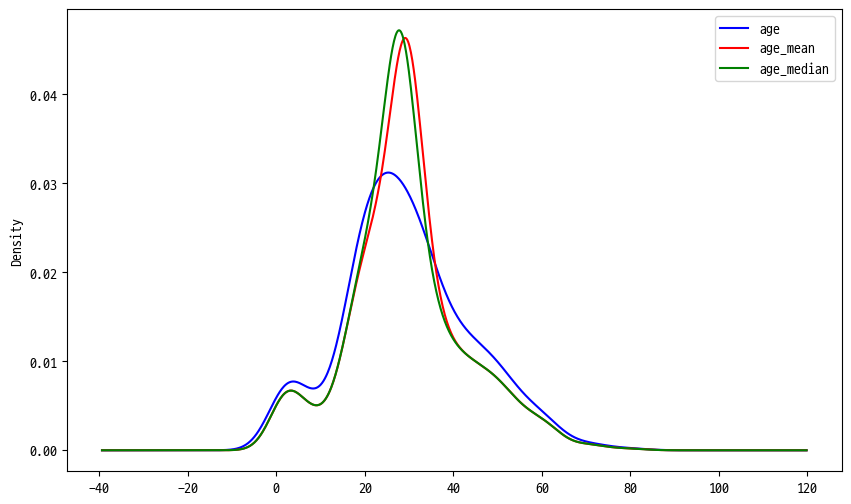

In [365]:
fig, ax = plt.subplots(figsize=(10,6))

X_tr['age'].plot(kind='kde', ax=ax, color='blue')
X_tr['age_mean'].plot(kind='kde', ax=ax, color='red')
X_tr['age_median'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


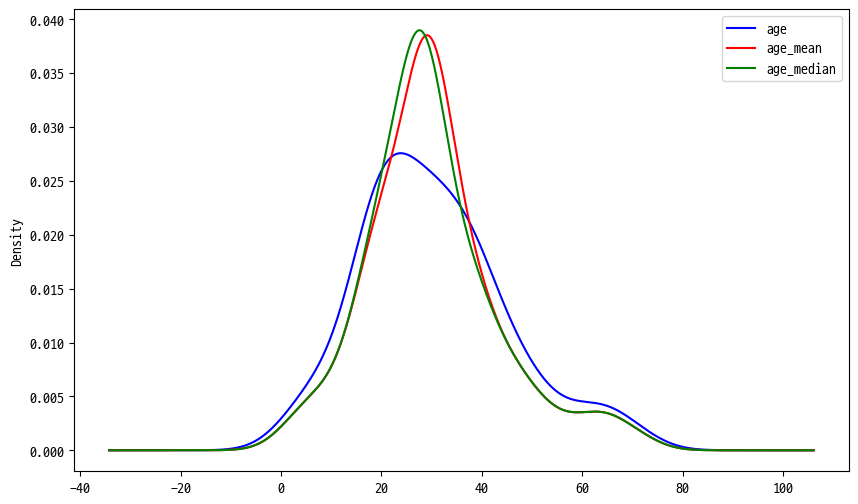

In [366]:
X_te['age_mean'] = X_te['age'].fillna(X_tr['age'].mean())
X_te['age_median'] = X_te['age'].fillna(X_tr['age'].median())

fig, ax = plt.subplots(figsize=(10,6))

X_te['age'].plot(kind='kde', ax=ax, color='blue')
X_te['age_mean'].plot(kind='kde', ax=ax, color='red')
X_te['age_median'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [367]:
X_tr['age_random'] = X_tr['age']

# random sampling
random_sampling = (X_tr['age'].dropna().sample(X_tr['age'].isnull().sum()))
random_sampling.index = X_tr[lambda x: x['age'].isnull()].index # index 부여

# NA imputation
X_tr.loc[X_tr['age'].isnull(), 'age_random'] = random_sampling

# 확인
X_tr[['age', 'age_random']].isnull().sum()

age           140
age_random      0
dtype: int64

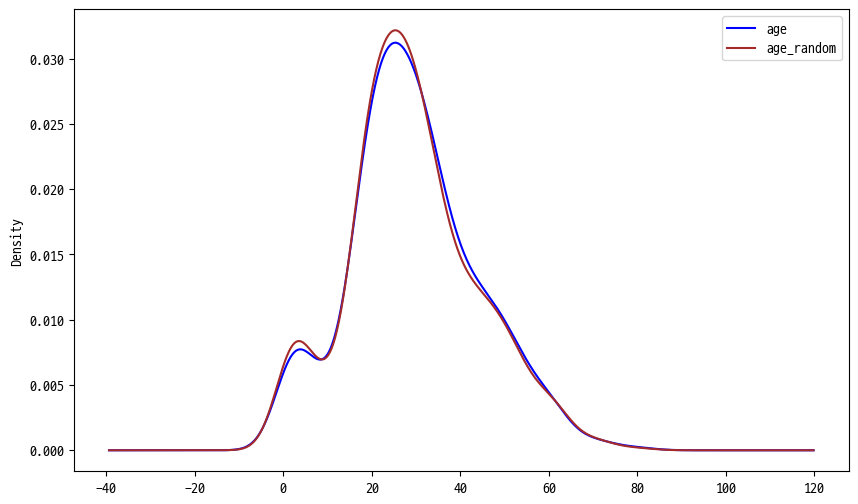

In [368]:
fig, ax = plt.subplots(figsize=(10,6))

X_tr['age'].plot(kind='kde', ax=ax, color='blue')
X_tr['age_random'].plot(kind='kde', ax=ax, color='brown')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

##### 범주형 치환

In [369]:
X_tr['embarked'].value_counts(dropna=False)

S      525
C      125
Q       60
NaN      2
Name: embarked, dtype: int64

In [370]:
# 최빈값
embarked_mode = X_tr['embarked'].mode().values[0]

# NA imputation
X_tr['embarked_filled'] = X_tr['embarked'].fillna(embarked_mode)
X_te['embarked_filled'] = X_te['embarked'].fillna(embarked_mode)

print(X_tr[['embarked', 'embarked_filled']].isnull().sum())
print('-'*50)
print(X_te[['embarked', 'embarked_filled']].isnull().sum())

embarked           2
embarked_filled    0
dtype: int64
--------------------------------------------------
embarked           0
embarked_filled    0
dtype: int64


##### sklearn 사용

###### SimpleImputer; 치환

파라미터
- missing_values: default값은 np.nan으로 비어있는 값을 채우게 되고 필요시 다른 값을 빈값으로 인식하게 할 수 있다.  
- strategy: 채울 값에 대한 함수; mean, median, most_frequent, constant(따로 지정한 값)
- fill_value: strategy의 값이 constant일 때, 여기에 정의된 값으로 채움 

In [371]:
from sklearn.impute import SimpleImputer

# strategy = mean, median, most_frequent
imputer = SimpleImputer(strategy='mean')

X_tr['age_simple_mean'] = imputer.fit_transform(X_tr[['age']])
# imputer.fit(X_tr[['age']]) # age의 평균값 계싼
# X_tr['age_simple_mean'] = imputer.fit_transform(X_tr[['age']])  # null에 평균값 적용

X_te['age_simple_mean'] = imputer.transform(X_te[['age']])

X_tr[['age', 'age_simple_mean']].isnull().sum()

age                140
age_simple_mean      0
dtype: int64

###### KNNImputer 모델 기반

In [372]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

X_tr['age_knn'] = imputer.fit_transform(X_tr[["age"]])
X_te['age_knn'] = imputer.transform(X_te[["age"]])

X_tr[['age', 'age_knn']].isnull().sum()

age        140
age_knn      0
dtype: int64

###### IterativeImputer; 모델 기반

In [373]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=SEED)

X_tr['age_iter_none'] = imputer.fit_transform(X_tr[['age']])
X_te['age_iter_none'] = imputer.transform(X_te[['age']])

X_tr[['age', 'age_iter_none']].isnull().sum()

age              140
age_iter_none      0
dtype: int64

In [374]:
from sklearn.ensemble import RandomForestRegressor
imputer = IterativeImputer(estimator=RandomForestRegressor(verbose=0, random_state=SEED), max_iter=10, verbose=0, imputation_order='ascending', random_state=SEED)

X_tr['age_iter_none'] = imputer.fit_transform(X_tr[["age"]])
X_te['age_iter_none'] = imputer.transform(X_te[["age"]])

X_tr[['age', 'age_iter_none']].isnull().sum()

age              140
age_iter_none      0
dtype: int64

##### 비대칭 데이터

외도 첨도

###### 비대칭 데이터 확인

In [375]:
# 왜도
X_tr['fare'].skew()

4.875065571137606

In [376]:
# 첨도
X_tr['fare'].kurt()

33.67953505365366

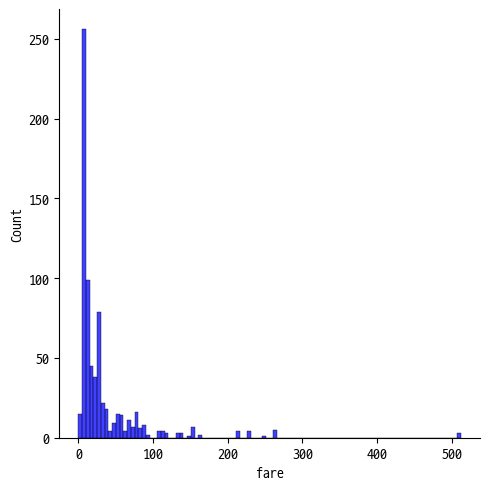

In [377]:
sns.displot(X_tr["fare"], color="b", label="Skewness : %.2f"%(df["fare"].skew()))

###### 비대칭 데이터 처리

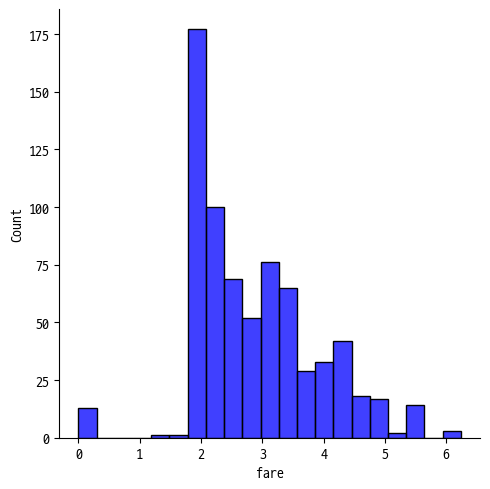

In [378]:
X_tr["fare"] = X_tr["fare"].map(lambda i: np.log(i) if i > 0 else 0) # log를 이용하여 비대칭 처리
X_te["fare"] = X_te["fare"].map(lambda i: np.log(i) if i > 0 else 0) # log를 이용하여 비대칭 처리
sns.displot(X_tr["fare"], color="b", label="Skewness : %.2f"%(X_tr["fare"].skew()))

In [379]:
X_tr['fare'].skew(), X_tr['fare'].kurt()

(0.4551381891080033, 0.7282528409527824)

##### 이상치

###### 이상치 확인


In [380]:
X_tr['age'].skew(), X_tr['age'].kurt()

(0.3310017370749743, 0.1492333819804159)

<AxesSubplot: ylabel='age'>

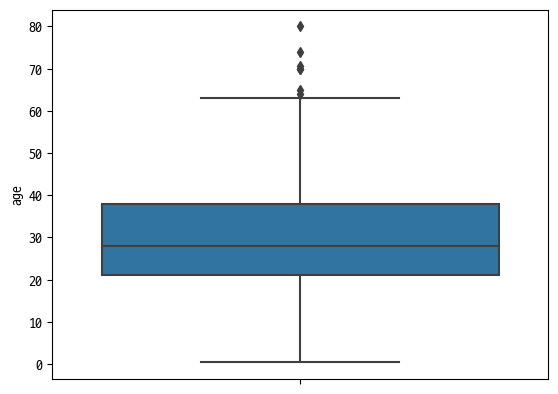

In [381]:
sns.boxplot(y=X_tr['age'], data=X_tr)

<AxesSubplot: ylabel='age'>

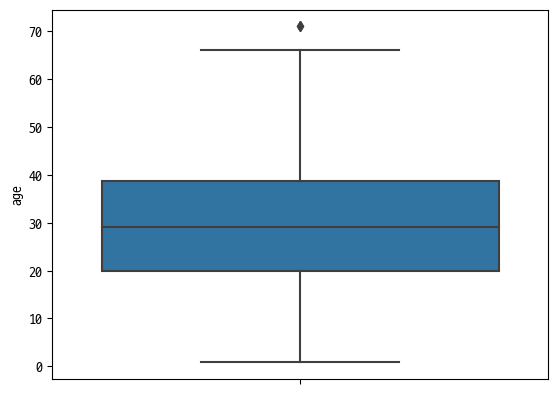

In [382]:
sns.boxplot(y=X_te['age'], data=X_te)

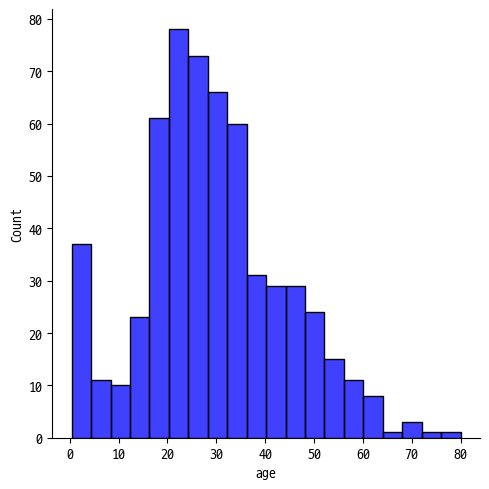

In [383]:
sns.displot(X_tr["age"], color="b", label="Skewness : %.2f"%(X_tr["age"].skew()))

<AxesSubplot: xlabel='survived', ylabel='age'>

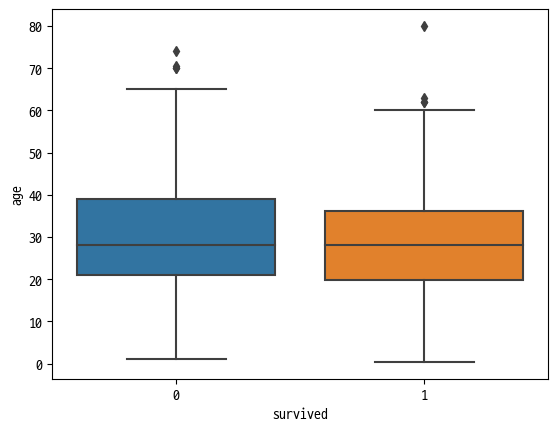

In [384]:
sns.boxplot(x=X_tr['survived'], y=X_tr['age'], data=X_tr)

In [385]:
X_tr.groupby(['survived'])['age'].quantile([0.25,  0.75])

survived      
0         0.25    21.00
          0.75    39.00
1         0.25    19.75
          0.75    36.25
Name: age, dtype: float64

In [386]:
IQR = X_tr['age'].quantile([0.25, 0.75]).values[1] - X_tr['age'].quantile([0.25, 0.75]).values[0]

Upper_boundary = X_tr['age'].median() + 1.5*IQR
Lower_boundary = X_tr['age'].median() - 1.5*IQR
# upper 이상 : 이상치 lower 이하 : 이상치
print('age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_boundary, upperboundary=Upper_boundary))

age outliers are values < 2.5 or > 53.5


In [387]:
cond1 = X_tr['age'] > Upper_boundary
cond2 = X_tr['age'] < Lower_boundary

cond = cond1 | cond2
outlier = df.loc[cond]
print(outlier.shape, df.shape)
outlier.head()

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

###### 이상치 처리

In [ ]:
X_tr['age'] = X_tr['age'].map(lambda x: Upper_boundary if x > Upper_boundary else x)
X_tr['age'] = X_tr['age'].map(lambda x: Lower_boundary if x < Lower_boundary else x)

In [ ]:
cond1 = X_tr['age'] > Upper_boundary
cond2 = X_tr['age'] < Lower_boundary

cond = cond1 | cond2
outlier = df.loc[cond]
print(outlier.shape, df.shape)
outlier.head()

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

<AxesSubplot: ylabel='age'>

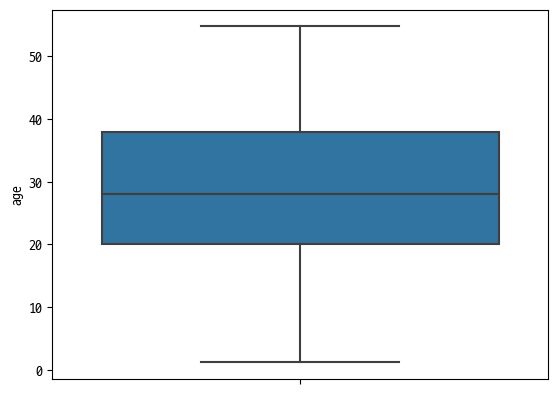

In [ ]:
sns.boxplot(y=X_te['age'], data=X_te)

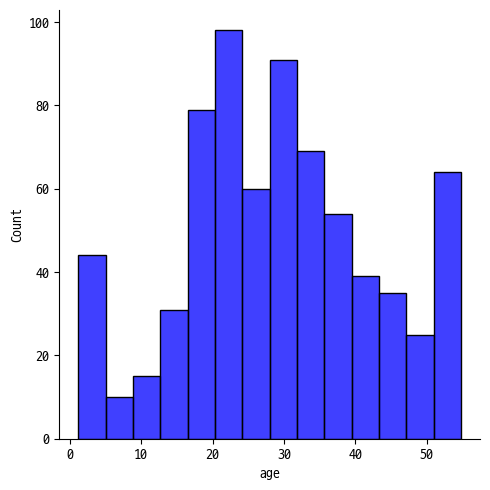

In [ ]:
sns.displot(X_tr["age"], color="b", label="Skewness : %.2f"%(X_tr["age"].skew()))

<AxesSubplot: xlabel='survived', ylabel='age'>

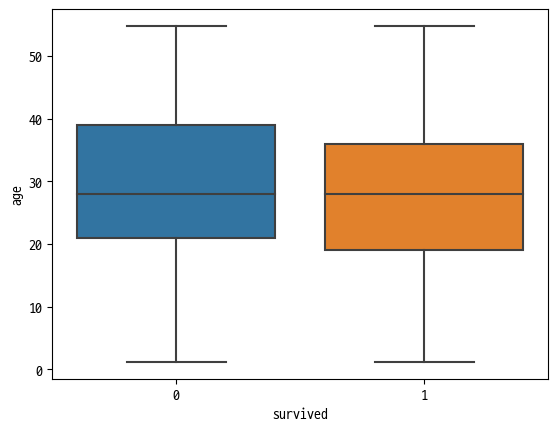

In [ ]:
sns.boxplot(x=X_tr['survived'], y=X_tr['age'], data=X_tr)